# Matplotlib Tutorial Part 14 - Annotations and Placing Text

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np

## Getting and Cleaning Data

In [7]:
stock = "EBAY"

# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=1m/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []  
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})    

## Placing Text

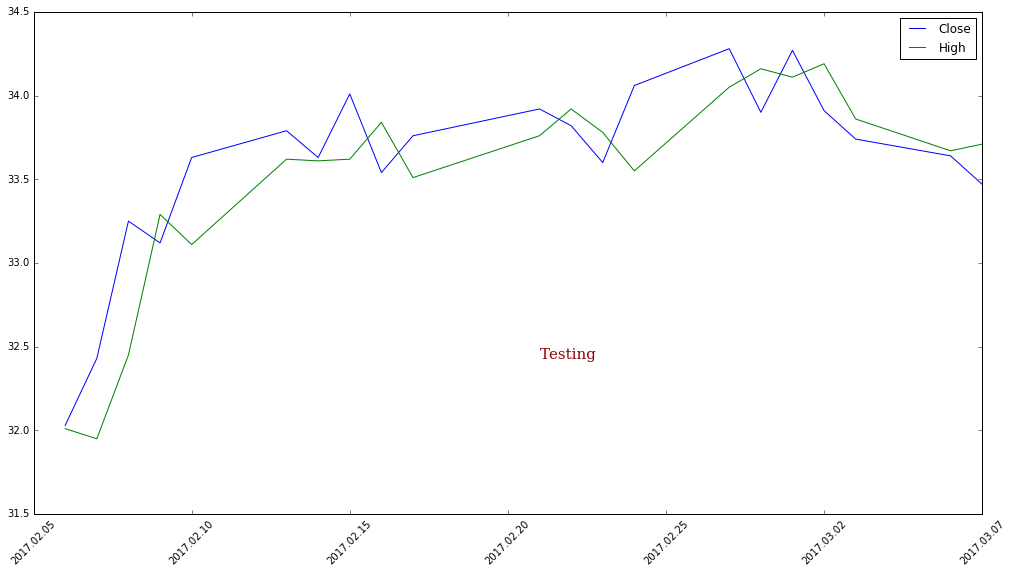

In [16]:
fig = plt.figure(figsize=(17,9))

ax1 = plt.subplot2grid((1,1),(0,0))

#Plot Lines
ax1.plot(date,closep,label='Close')
ax1.plot(date,openp,label='High')

# Rotate Labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Set Date Format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Placing Text
font_dict = {'family':'serif',
            'color':'darkred',
            'size':15}
ax1.text(date[10], closep[1], 'Testing', fontdict=font_dict)

plt.legend()
plt.show()

## Anotations

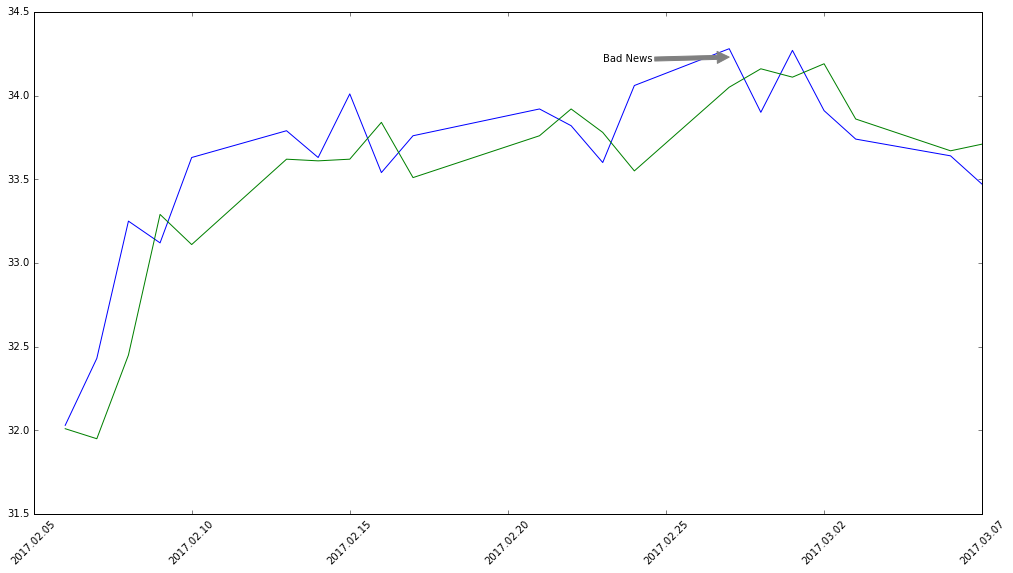

In [19]:
fig = plt.figure(figsize=(17,9))

ax1 = plt.subplot2grid((1,1),(0,0))

#Plot Lines
ax1.plot(date,closep)
ax1.plot(date,openp)

# Rotate Labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Set Date Format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Anotation
ax1.annotate('Bad News', (date[14],highp[10]), 
             xytext=(0.6,0.9),
             textcoords='axes fraction',
             arrowprops = dict(color='grey'))

plt.show()

## Anotations of Last Price

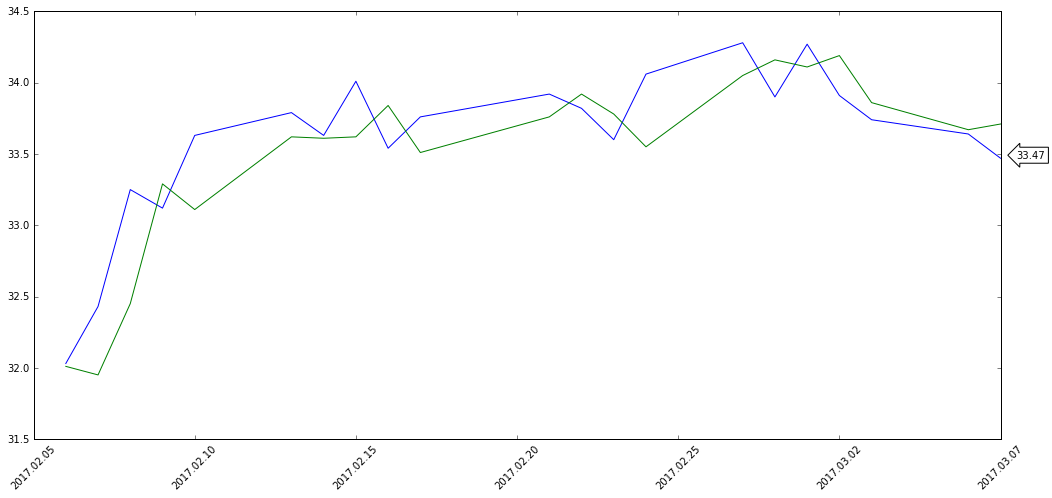

In [14]:
fig = plt.figure(figsize=(17,9))

ax1 = plt.subplot2grid((1,1),(0,0))

#Plot Lines
ax1.plot(date,closep)
ax1.plot(date,openp)

# Rotate Labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Set Date Format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Anotation
bbox_props = dict(boxstyle='larrow',fc='w',ec='k')

ax1.annotate(str(closep[-1]), (date[-1],closep[-1]), 
             xytext=(date[-1]+0.5, closep[-1]),
             bbox = bbox_props)
plt.subplots_adjust(left=.11,
                   bottom=.24,
                   right=0.9,
                   top=.9,
                   wspace=.2,
                   hspace=0)
plt.show()

## Anotations Guide

In [11]:
%%HTML
<iframe src="http://matplotlib.org/users/annotations.html" width="980" height="500"></iframe>